In [36]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('./mouse.txt', sep=' ', header=None)
data.head()

,0,1
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470


In [51]:
np.shape(data)[0]

500

In [38]:
data.set_axis(['x','y'], axis = 1, inplace = True)

In [39]:
x = data.iloc[:,:1]
y = data.iloc[:,1:2]

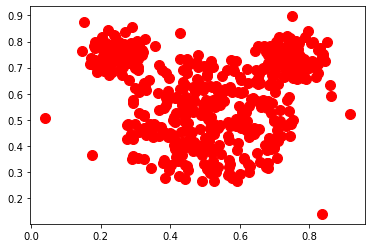

In [40]:
from matplotlib import pyplot
pyplot.plot(x, y, linestyle = 'none', marker = 'o', markersize = 10, color='red')

In [52]:
from sklearn.ensemble import IsolationForest

In [54]:
clf = IsolationForest(random_state=1, contamination = 10/np.shape(data)[0]).fit(data)

IsolationForest(contamination=0.02, random_state=1)

In [55]:
prediction = clf.predict(data)

In [56]:
data['result'] = prediction

<AxesSubplot:xlabel='x', ylabel='y'>

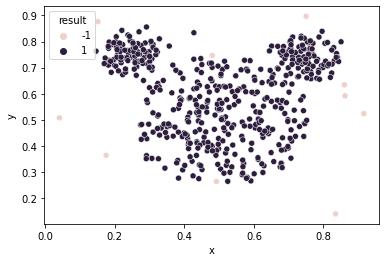

In [57]:
import seaborn as sns
sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'result')

# Credit card

In [61]:
cart_data = pd.read_csv('creditcard.csv')
cart_data.drop(['Time'], axis = 1, inplace= True)
cart_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
frodulent = cart_data[cart_data['Class'] == 1]
normal = cart_data[cart_data['Class'] == 0]

In [64]:
selected_normal = normal.sample(n = 5000)

In [70]:
subset = frodulent.append(selected_normal)
X = subset.iloc[:,:-1]
y = subset.iloc[:,-1]
np.shape(train)

(5492, 29)

In [72]:
pred = IsolationForest(random_state=1, contamination = 492/np.shape(data)[0]).fit_predict(X)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred)

array([[   0,    0,    0],
       [4912,    0,   88],
       [ 492,    0,    0]], dtype=int64)